In [6]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv',  na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [9]:
len(db.columns)

55

In [10]:
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [11]:
db.shape

(150001, 55)

In [12]:
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [13]:
db.isnull().sum().sum()

1031392

In [14]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecommunication dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Telecommunication dataset contains 12.5 % missing values.


In [15]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [16]:
db.skew(axis=0)
# to check the distribution of the data of the whole columns

Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

<AxesSubplot:>

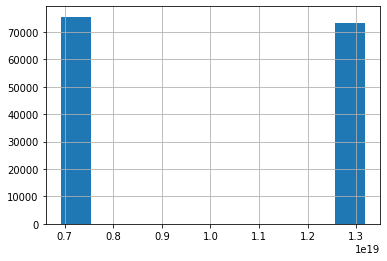

In [17]:
db['Bearer Id'].hist()
# to check the distribution of the data of a column

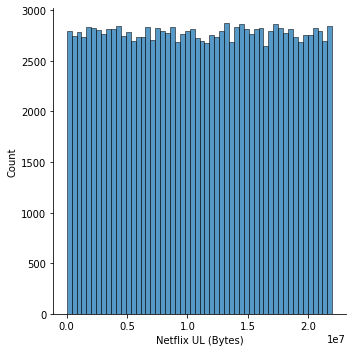

In [18]:
import seaborn as sns
sns.displot(data=db, x=db['Netflix UL (Bytes)'])
# to check the distribution of the data of a specific column

In [19]:
df_clean = db.drop(
    ['Nb of sec with 125000B < Vol DL' ,             
'Nb of sec with 1250B < Vol UL < 6250B' ,     
'Nb of sec with 31250B < Vol DL < 125000B',     
'Nb of sec with 37500B < Vol UL',              
'Nb of sec with 6250B < Vol DL < 31250B',       
'Nb of sec with 6250B < Vol UL < 37500B',      
'Nb of sec with Vol DL < 6250B',                
'Nb of sec with Vol UL < 1250B',
 'DL TP < 50 Kbps (%)',                         
'50 Kbps < DL TP < 250 Kbps (%)',              
'250 Kbps < DL TP < 1 Mbps (%)',               
'DL TP > 1 Mbps (%)',                          
'UL TP < 10 Kbps (%)',                         
'10 Kbps < UL TP < 50 Kbps (%)',               
'50 Kbps < UL TP < 300 Kbps (%)',              
'UL TP > 300 Kbps (%)',    
    ], axis=1)
df_clean.shape

(150001, 39)

In [20]:
df_clean.dtypes

Bearer Id                      float64
Start                           object
Start ms                       float64
End                             object
End ms                         float64
Dur. (ms)                      float64
IMSI                           float64
MSISDN/Number                  float64
IMEI                           float64
Last Location Name              object
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
HTTP DL (Bytes)                float64
HTTP UL (Bytes)                float64
Activity Duration DL (ms)      float64
Activity Duration UL (ms)      float64
Dur. (ms).1                    float64
Handset Manufacturer            object
Handset Type                    object
Social Media DL (Bytes)        float64
Social Media UL (Bytes)        float64
Google DL (Bytes)        

In [21]:
df_clean.isna().sum()

Bearer Id                        991
Start                              1
Start ms                           1
End                                1
End ms                             1
Dur. (ms)                          1
IMSI                             570
MSISDN/Number                   1066
IMEI                             572
Last Location Name              1153
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
HTTP DL (Bytes)                81474
HTTP UL (Bytes)                81810
Activity Duration DL (ms)          1
Activity Duration UL (ms)          1
Dur. (ms).1                        1
Handset Manufacturer             572
Handset Type                     572
Social Media DL (Bytes)            0
Social Media UL (Bytes)            0
Google DL (Bytes)                  0
Google UL (Bytes)                  0
E

In [22]:
df_clean['Start'] = df_clean['Start'].fillna(df_clean['Start'].mode()[0])
df_clean['End'] = df_clean['End'].fillna(df_clean['End'].mode()[0])
df_clean['Last Location Name'] = df_clean['Last Location Name'].fillna(df_clean['Last Location Name'].mode()[0])
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])

In [23]:
df_clean['Bearer Id'] = df_clean['Bearer Id'].fillna(df_clean['Bearer Id'].median())
df_clean['Start ms'] = df_clean['Start ms'].fillna(df_clean['Start ms'].median())
df_clean['End ms'] = df_clean['End ms'].fillna(df_clean['End ms'].median())
df_clean['Dur. (ms)'] = df_clean['Dur. (ms)'].fillna(df_clean['Dur. (ms)'].median())
df_clean['IMSI'] = df_clean['IMSI'].fillna(df_clean['IMSI'].median())
df_clean['MSISDN/Number'] = df_clean['MSISDN/Number'].fillna(df_clean['MSISDN/Number'].median())
df_clean['IMEI'] = df_clean['IMEI'].fillna(df_clean['IMEI'].median())
df_clean['Avg RTT DL (ms)'] = df_clean['Avg RTT DL (ms)'].fillna(df_clean['Avg RTT DL (ms)'].median())
df_clean['Avg RTT UL (ms)'] = df_clean['Avg RTT UL (ms)'].fillna(df_clean['Avg RTT UL (ms)'].median())
df_clean['Avg Bearer TP DL (kbps)'] = df_clean['Avg Bearer TP DL (kbps)'].fillna(df_clean['Avg Bearer TP DL (kbps)'].median())
df_clean['Avg Bearer TP UL (kbps)'] = df_clean['Avg Bearer TP UL (kbps)'].fillna(df_clean['Avg Bearer TP UL (kbps)'].median())
df_clean['TCP DL Retrans. Vol (Bytes)'] = df_clean['TCP DL Retrans. Vol (Bytes)'].fillna(df_clean['TCP DL Retrans. Vol (Bytes)'].median())
df_clean['TCP UL Retrans. Vol (Bytes)'] = df_clean['TCP UL Retrans. Vol (Bytes)'].fillna(df_clean['TCP UL Retrans. Vol (Bytes)'].median())
df_clean['HTTP DL (Bytes)'] = df_clean['HTTP DL (Bytes)'].fillna(df_clean['HTTP DL (Bytes)'].median())
df_clean['HTTP UL (Bytes)'] = df_clean['HTTP UL (Bytes)'].fillna(df_clean['HTTP UL (Bytes)'].median())
df_clean['Activity Duration DL (ms)'] = df_clean['Activity Duration DL (ms)'].fillna(df_clean['Activity Duration DL (ms)'].median())
df_clean['Activity Duration UL (ms)'] = df_clean['Activity Duration UL (ms)'].fillna(df_clean['Activity Duration UL (ms)'].median())

In [24]:
df_clean['Dur. (ms).1'] = df_clean['Dur. (ms).1'].fillna(df_clean['Dur. (ms).1'].median())
df_clean['Total DL (Bytes)'] = df_clean['Total DL (Bytes)'].fillna(df_clean['Total DL (Bytes)'].median())

In [25]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(10)

,0
824,46.573490
1318,201.700234
1568,523.706573
1847,135.765274
703,175.744425
579,278.434260
1962,557.573739
59,10.385875
520,126.276818
259,334.388840


In [26]:
original_data[0].min(), original_data[0].max()

(0.03965479233283841, 1730.2012142925942)

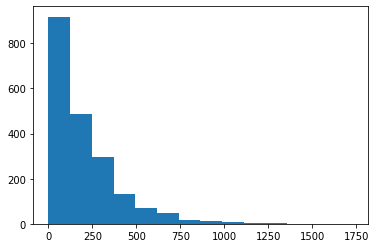

In [27]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

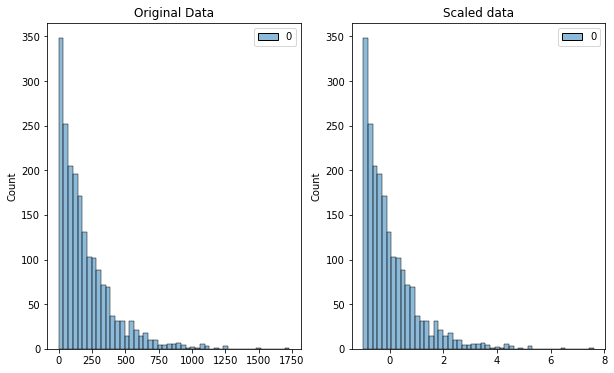

In [28]:
from sklearn.preprocessing import StandardScaler
def standard_scaler(df):
    s_scaler = StandardScaler()
    scaled_data = s_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
standard_scaler(original_data)

In [29]:
df1 = df_clean.drop([
    'Social Media DL (Bytes)',   
'Social Media UL (Bytes)',        
'Google DL (Bytes)',              
'Google UL (Bytes)',              
'Email DL (Bytes)',               
'Email UL (Bytes)',               
'Youtube DL (Bytes)',             
'Youtube UL (Bytes)',            
'Netflix DL (Bytes)',             
'Netflix UL (Bytes)',            
'Gaming DL (Bytes)',              
'Gaming UL (Bytes)',             
'Other DL (Bytes)',               
'Other UL (Bytes)',              
'Total UL (Bytes)',            
'Total DL (Bytes)',
'Last Location Name',              
'Avg RTT DL (ms)',                
'Avg RTT UL (ms)',                
'Avg Bearer TP DL (kbps)',        'Avg Bearer TP UL (kbps)',        
'TCP DL Retrans. Vol (Bytes)',    'TCP UL Retrans. Vol (Bytes)',   
'HTTP DL (Bytes)',                
'HTTP UL (Bytes)', 
],axis = 1

)

In [30]:
df1.dtypes


Bearer Id                    float64
Start                         object
Start ms                     float64
End                           object
End ms                       float64
Dur. (ms)                    float64
IMSI                         float64
MSISDN/Number                float64
IMEI                         float64
Activity Duration DL (ms)    float64
Activity Duration UL (ms)    float64
Dur. (ms).1                  float64
Handset Manufacturer          object
Handset Type                  object
dtype: object

In [31]:
df1.to_csv(r"../data/clean_data.csv", index = False)

In [32]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

pd.options.display.float_format = format_float

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':'The top 10 handset used by customers'}, ylabel='Handset Type'>

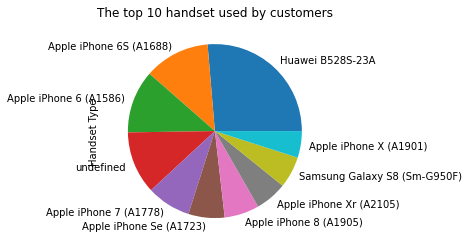

In [33]:
all = df_clean['Handset Type'].value_counts().head(10)
print(all)
all.plot(kind="pie", title="The top 10 handset used by customers")

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


<AxesSubplot:title={'center':'The top 3 handset manufacturers'}, ylabel='Handset Manufacturer'>

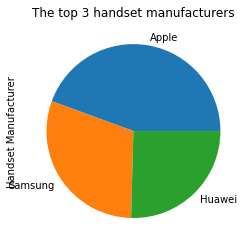

In [34]:
df_top_3_manf = df_clean['Handset Manufacturer'].value_counts().head(3)
print(df_top_3_manf)
df_top_3_manf.plot(kind="pie", title="The top 3 handset manufacturers")

In [35]:

# get the top 10 handsets used by customers

# get the top 3 handset manufacturers

apple_manufacturer = df_clean.loc[df_clean['Handset Manufacturer'] == 'Apple', ['Handset Type']].value_counts().nlargest(5)
samsung_manufacturer = df_clean.loc[df_clean['Handset Manufacturer'] == 'Samsung', ['Handset Type']].value_counts().nlargest(5)
huawei_manufacturer = df_clean.loc[df_clean['Handset Manufacturer'] == 'Huawei', ['Handset Type']].value_counts().nlargest(5)

print("Top 5 apple headset types\n", apple_manufacturer)
print("\nTop 5 samsung headset types\n", samsung_manufacturer)
print("\nTop 5 huawei headset types\n", huawei_manufacturer)

Top 5 apple headset types
 Handset Type           
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
dtype: int64

Top 5 samsung headset types
 Handset Type                
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
dtype: int64

Top 5 huawei headset types
 Handset Type                  
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
dtype: int64


In [36]:
df_clean.groupby('IMEI')

In [37]:
percent_missing(df_clean)

The Telecommunication dataset contains 0.0 % missing values.


In [38]:
missing_values_table(df_clean)

Your selected dataframe has 39 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Total UL (Bytes),1,0.00,float64


In [39]:
db.shape

(150001, 55)

In [40]:
dfExp = df_clean.copy()
dfExp

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,"568,730.00","20,949.50","1,941,949.00","229,733.00","37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,"568,730.00","20,949.50","1,941,949.00","229,733.00",168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),"1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,45.00,5.00,6.00,9.00,"568,730.00","20,949.50","1,941,949.00","229,733.00",0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,45.00,5.00,44.00,44.00,"568,730.00","20,949.50","1,941,949.00","229,733.00","3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,45.00,5.00,6.00,9.00,"568,730.00","20,949.50","1,941,949.00","229,733.00",0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"7,277,825,670,196,679,680.00",4/29/2019 7:28,451.00,4/30/2019 6:02,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,32.00,0.00,52.00,65.00,"568,730.00","20,949.50","1,941,949.00","229,733.00","42,376.00","41,915.00","81,230,763.00",Apple,Apple iPhone 8 Plus (A1897),"3,464,974.00","52,091.00","9,967,603.00","2,817,311.00","57,639.00","633,237.

In [41]:
dfExp.dtypes

Bearer Id                      float64
Start                           object
Start ms                       float64
End                             object
End ms                         float64
Dur. (ms)                      float64
IMSI                           float64
MSISDN/Number                  float64
IMEI                           float64
Last Location Name              object
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
HTTP DL (Bytes)                float64
HTTP UL (Bytes)                float64
Activity Duration DL (ms)      float64
Activity Duration UL (ms)      float64
Dur. (ms).1                    float64
Handset Manufacturer            object
Handset Type                    object
Social Media DL (Bytes)        float64
Social Media UL (Bytes)        float64
Google DL (Bytes)        

In [42]:
dfExp["Dur. (ms)"].describe()

count     150,001.00
mean      104,608.44
std        81,037.36
min         7,142.00
25%        57,442.00
50%        86,399.00
75%       132,430.00
max     1,859,336.00
Name: Dur. (ms), dtype: float64

In [43]:
dfExp["Handset Type"].describe()

count               150001
unique                1396
top       Huawei B528S-23A
freq                 20324
Name: Handset Type, dtype: object

In [44]:
dfExp["Handset Manufacturer"].describe()

count     150001
unique       170
top        Apple
freq       60137
Name: Handset Manufacturer, dtype: object

In [46]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

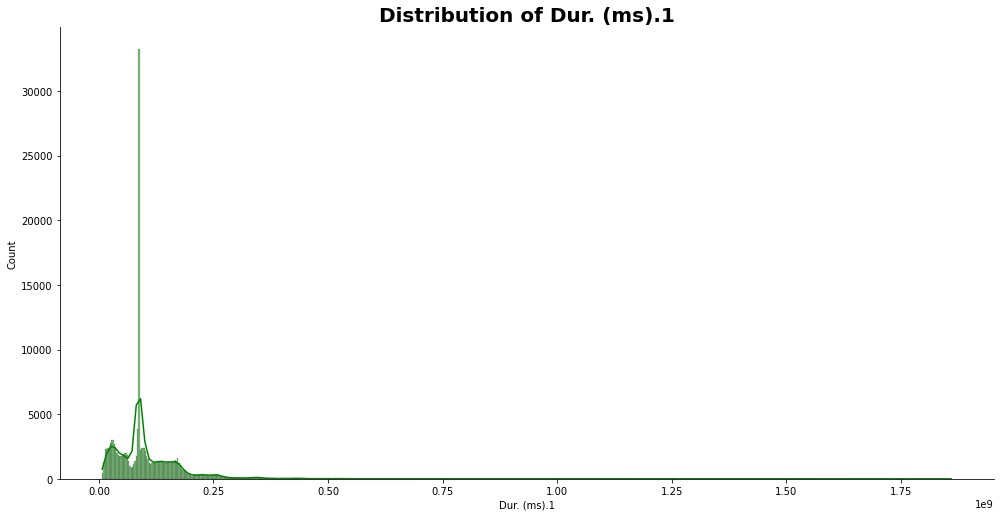

In [50]:
plot_hist(dfExp, "Dur. (ms).1", "green")

In [63]:

# get the top 10 handsets used by customers
top10handsets = df_clean['Handset Type'].value_counts().nlargest(n=10)
top10handsets


# get the top 3 handset manufacturers
top3manufacturers = df_clean['Handset Manufacturer'].value_counts().nlargest(n=3)
top3manufacturers


apple_manufacturer = df_clean.loc[df_clean['Handset Manufacturer'] == 'Apple', ['Handset Type']].value_counts().nlargest(5)
samsung_manufacturer = df_clean.loc[df_clean['Handset Manufacturer'] == 'Samsung', ['Handset Type']].value_counts().nlargest(5)
huawei_manufacturer = df_clean.loc[df_clean['Handset Manufacturer'] == 'Huawei', ['Handset Type']].value_counts().nlargest(5)

print("Top 5 apple headset types\n", apple_manufacturer)
print("\nTop 5 samsung headset types\n", samsung_manufacturer)
print("\nTop 5 huawei headset types\n", huawei_manufacturer)

Top 5 apple headset types
 Handset Type           
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
dtype: int64

Top 5 samsung headset types
 Handset Type                
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
dtype: int64

Top 5 huawei headset types
 Handset Type                  
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
dtype: int64


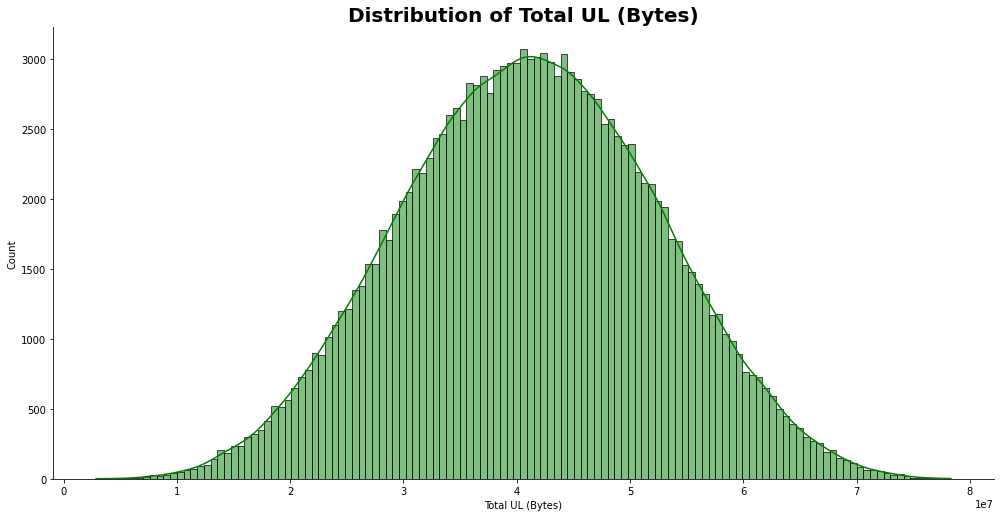

In [52]:
plot_hist(df_clean, "Total UL (Bytes)", "green")

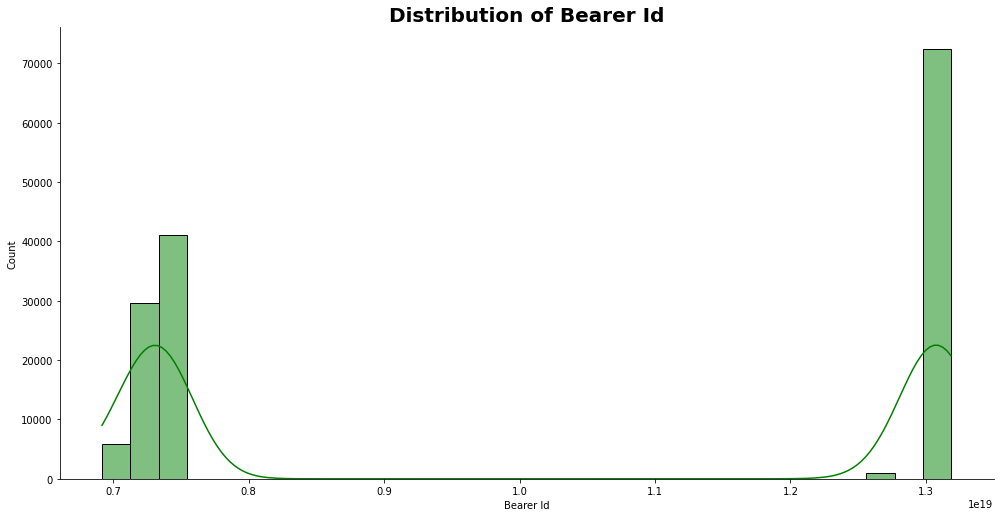

In [54]:
plot_hist(df_clean, "Bearer Id", "green")

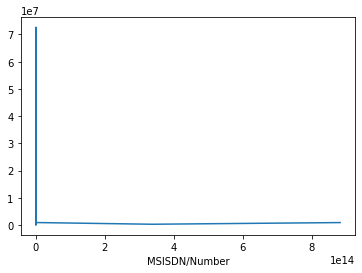

ValueError: Could not interpret input 'total_DL_UL'

<Figure size 864x504 with 0 Axes>

In [62]:
Number_od_xDR_session = df_clean.groupby('MSISDN/Number')['Bearer Id'].count()
session_duration = df_clean.groupby('MSISDN/Number')['Dur. (ms)'].sum()

total_DL_UL = df_clean.groupby(['MSISDN/Number','Bearer Id'])['Total DL (Bytes)','Total UL (Bytes)'].sum()
session_duration.plot()
plt.show()
session_duration.head()

ValueError: Could not interpret input 'total_DL_UL'

<Figure size 864x504 with 0 Axes>